# Customer Segmentation Using K-Means and Hierarchical Clustering for Targeted Marketing Strategies

# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Converting Dt_Customer to datetime


In [3]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors='coerce')

# Filling missing Income with median


In [4]:
df["Income"].fillna(df["Income"].median(), inplace=True)

# Dropping unnecessary columns


In [5]:
df.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

# Encoding categorical variables


In [6]:
df = pd.get_dummies(df, columns=["Education", "Marital_Status"], drop_first=True)

# Display summary


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year_Birth               2240 non-null   int64         
 1   Income                   2240 non-null   float64       
 2   Kidhome                  2240 non-null   int64         
 3   Teenhome                 2240 non-null   int64         
 4   Dt_Customer              916 non-null    datetime64[ns]
 5   Recency                  2240 non-null   int64         
 6   MntWines                 2240 non-null   int64         
 7   MntFruits                2240 non-null   int64         
 8   MntMeatProducts          2240 non-null   int64         
 9   MntFishProducts          2240 non-null   int64         
 10  MntSweetProducts         2240 non-null   int64         
 11  MntGoldProds             2240 non-null   int64         
 12  NumDealsPurchases        2240 non-

## Distribution of Spending on Different Product Categories

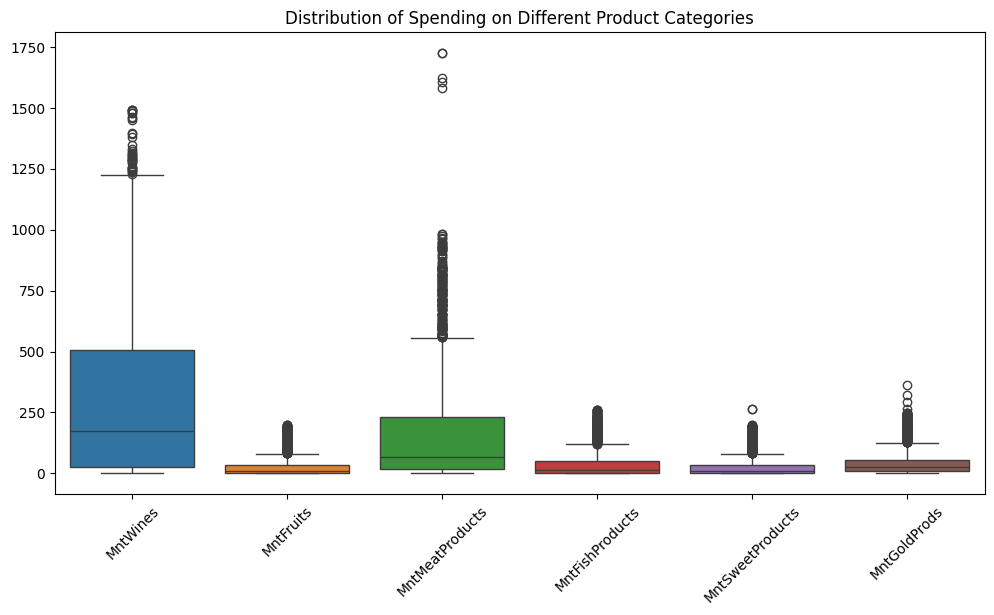

In [8]:
plt.figure(figsize=(12, 6))
spending_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
sns.boxplot(data=df[spending_cols])
plt.xticks(rotation=45)
plt.title("Distribution of Spending on Different Product Categories")
plt.show()

## Feature Correlation Heatmap

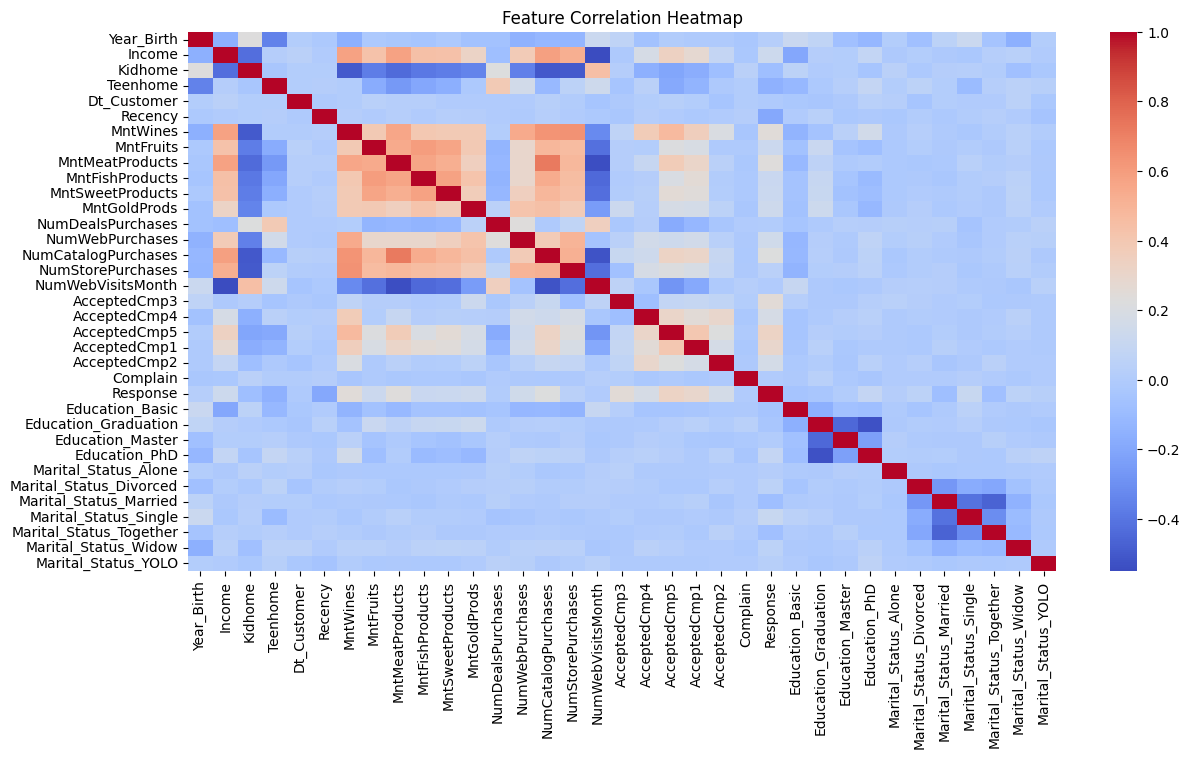

In [9]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
scaler = StandardScaler()
features = ["Income", "Recency", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
df_scaled = scaler.fit_transform(df[features])

# Elbow Method for Optimal Clusters

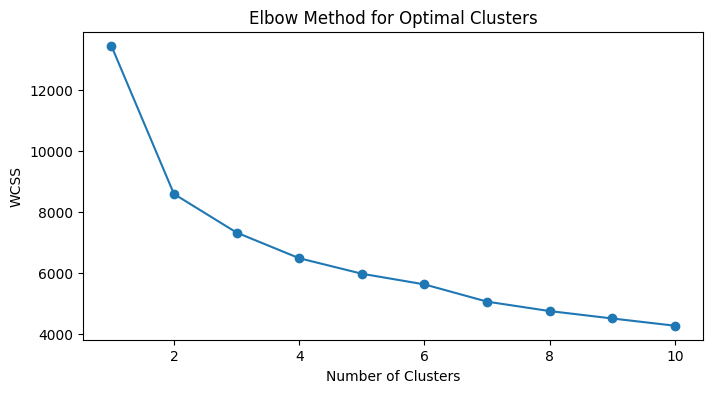

In [11]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## K means clustering

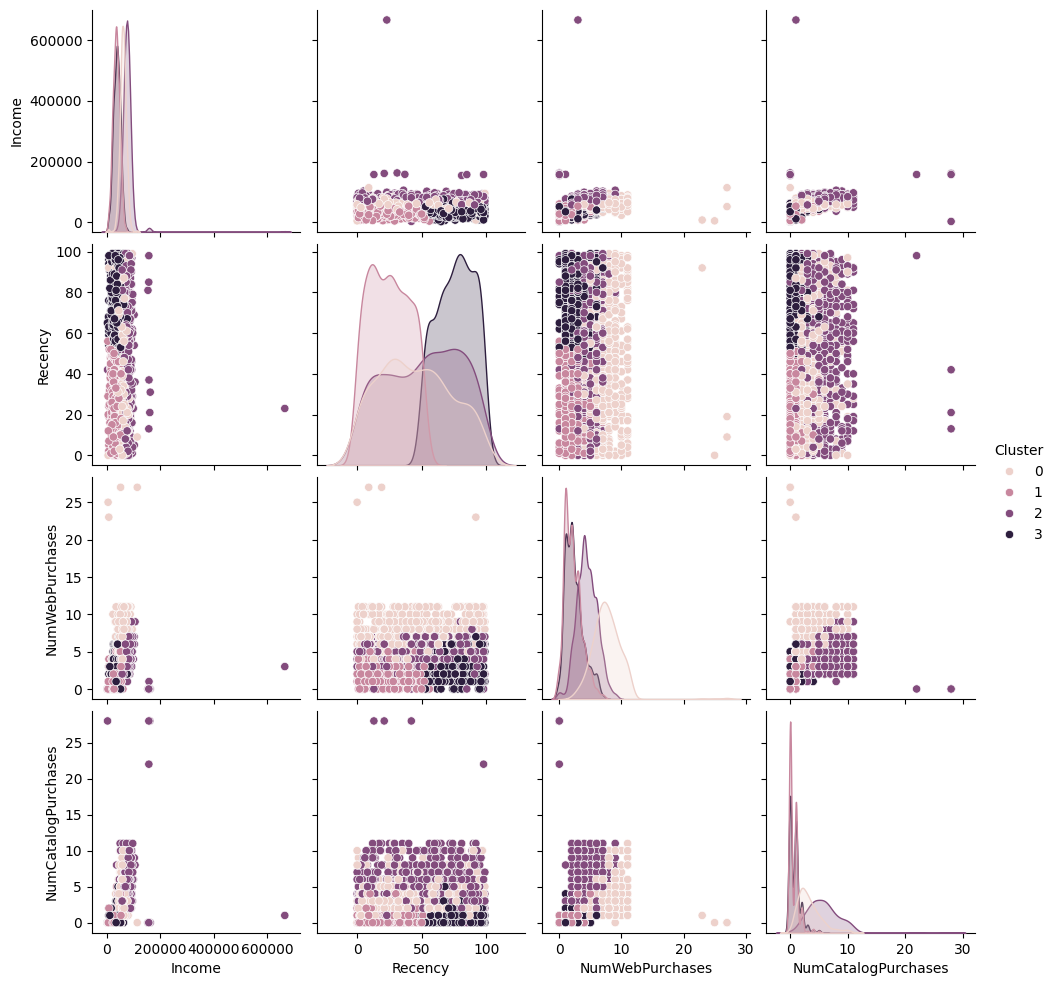

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

sns.pairplot(df, hue="Cluster", vars=["Income", "Recency", "NumWebPurchases", "NumCatalogPurchases"])
plt.show()

In [13]:
df_sample = df.sample(n=50, random_state=42)

In [14]:
scaler = StandardScaler()
df_scaled_sample = scaler.fit_transform(df_sample[["Income", "Recency", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]])

## Performing hierarchical clustering
## Plotting the dendrogram


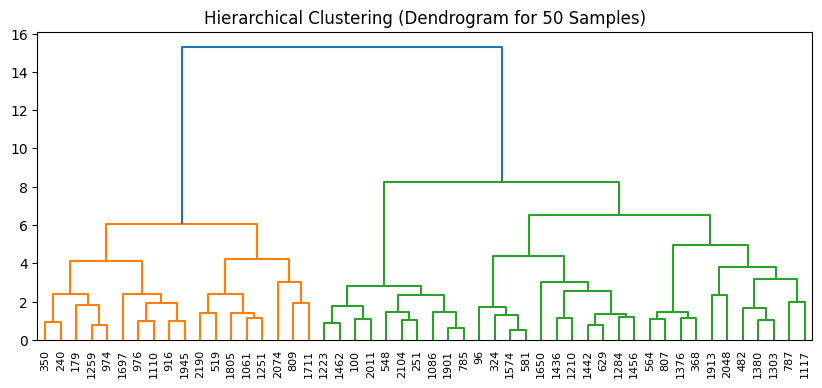

In [15]:
linkage_matrix = linkage(df_scaled_sample, method="ward")

plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix, labels=df_sample.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering (Dendrogram for 50 Samples)")
plt.show()